Minimalna liczba eigenfaces, by zachować >60% informacji: r = 29
Zachowana energia: 60.64%


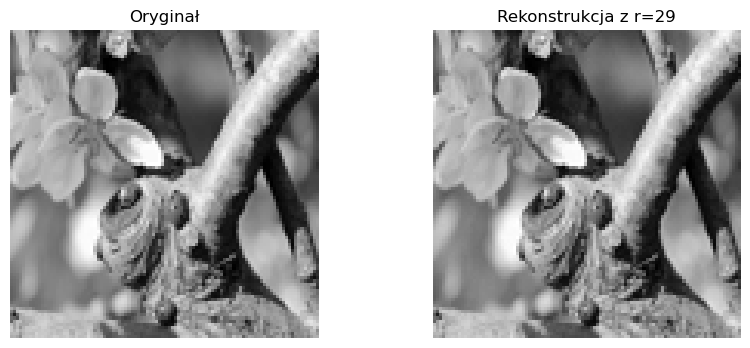

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === Wczytanie pojedynczego obrazu ===
img = Image.open('14.webp').convert('L')
img = img.resize((100, 100))
img_data = np.array(img)
face_vector = img_data.flatten()

# === Tworzenie sztucznego zbioru twarzy z szumem ===
num_samples = 50
noise_level = 5.0  # im większa liczba, tym większe różnice między kopiami

faces = np.stack([
    face_vector + np.random.normal(0, noise_level, face_vector.shape)
    for _ in range(num_samples)
], axis=1)

# === PCA ===
avgFace = np.mean(faces, axis=1)
X = faces - avgFace[:, np.newaxis]
U, S, VT = np.linalg.svd(X, full_matrices=False)

# === Oblicz r dla 60% energii ===
k = 0.60
cumulative_energy = np.cumsum(S)
total_energy = cumulative_energy[-1]
energy_ratio = cumulative_energy / total_energy
r = np.argmax(energy_ratio >= k) + 1

print(f'Minimalna liczba eigenfaces, by zachować >{int(k*100)}% informacji: r = {r}')
print(f'Zachowana energia: {energy_ratio[r-1]*100:.2f}%')

# === Rekonstrukcja ===
testFace = face_vector
testFaceMS = testFace - avgFace
reconFace = avgFace + U[:, :r] @ (U[:, :r].T @ testFaceMS)

# === Wizualizacja ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_data, cmap='gray')
plt.title('Oryginał')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconFace.reshape(img_data.shape), cmap='gray')
plt.title(f'Rekonstrukcja z r={r}')
plt.axis('off')

plt.show()

